 # Analytics in Business - Case Study: Heat Smart Orkney (Energy)
 
 #### MSc Imperial Research Group

## Executive Summary

We estimate that 27,880 MWH of additional energy can be generated on Onkney Isles on an annual basis, by un-curtailling the wind turbines. Our analysis shows that an optimal penetration level of 20% of households throught the DR scheme would result in the most effective deployment of this additional energy. This level of penetration translates to 3,452 households taking part in the scheme. Our analysis and findings suggest that the additional energy should ideally be released to the grid in periods of high energy demand, which we find to be between 16:00 and 21:00 during the day. This strategy ensures an efficient maximisation of the extra energy, as well as an optimal use of the 40MW link to the mainland. We estimate that the DR scheme implemented the way we have defined it above, has the potential to bring in £32,372 of revenue.

The objective of this report is to analyse the setpoint forecasting error curtailment and storage curtailment in Orkney, and provide actionable business recommendations in order to increase the revenue of the wind turbine owners. 

The approach in the report is first calculating the curtailments from the two sources, then further investigating the impact of Demand Respond (DR) penetration, and finally indicating the potential number of local people needed to join the DR scheme.  

The results, discussion and conclusion are as following:  
1. Setpoint forecasting error curtailment  for 2017 for 77 turbines is 18,026 MWH and the annual curtailment for 77 turbines in 2016 and 2017 is 27,880 MWH.
2. As we asssumed that the wind turbine company needs to remain the hourly peak usage level for unpredicted high energy usage event, the hourly peak usage would be the amount of energy to be stored. The storage curtailment is defined as the opportunity cost between original plan and after implementing DR penetration. Since the original peak value is certain, we should choose the lowest new peak level to ensure that the enough energy the wind turbine company remains is equal to the new peak point. As presented in curtailed energy list for 5% testing interval, 20% DR penetration level produce the largest curtailed energy. Based on comparing the new peak value, we choose DR level equal to 20% which produces the lowest new peak value. Based on the observation of the DR graph, the ideal optimal DR level should be 20% by testing 5% DR level interval from 5% to 30%. If the level increases to 25%, the max usage during non-peak time would be higher and thus producing new storage curtailment.
3. The revenue increased from DR scheme is £32,372 based on 4,000 kwh per 700 GBP (Alex suggested on Slack).
4. At least 3,452 households with 50% of peak time energy usage for heating and cooling system need to be on our DR scheme in order to supply 20% level of DR penetration.
5. For people who join the DR scheme, the company could offer a £5 discount. For 3,452 households required in the scheme, £17,260 is required to attract enough local households.  
6. The remaining £15,112 is for the revenue of the company.


##  Overview of our analysis

- An overview of the context for the analysis, including a clear statement of the business problem
- clear statement of your hypotheses and predictions
- A brief overview of the approach used in your analysis.

Fossil fuels are usually used to produce energy. However, environmental concerns and considerable costs push governments towards renewable energy. Wind energy as a kind of renewable energy is favourable to the places with high wind most of the time. However, with low efficiency of forecasting the setpoint and storage curtailment for peak time, wind owners may lose the potential opportunity to make extra revenue. This report intends to do the initial research on whether the impact of the two problems can be reduced by a Demand Response (DR) scheme. In addition, we also analyse the benefit of the DR scheme and required number of households for this plan. We finally estimate the number of households that would need to participate in the DR scheme to make it viable. We also share additional insights gained through analysis; 1) on how to target the roll-out of the DR scheme for maximum effectiveness and 2) pricing strategy


#### Summary of assumptions and key design decisions
1. We define setpoint forecasting error curtailment as the period during which the setpoint of a given turbine is set lower that its maximum power output capacity; e.g. if maximum output is 900 KW and setpoint is 700 KW, the turbine is being curtailed
2. We define storage curtailment as the opportunity cost between original plan and after implementing DR penetration.
2. We compute the expected power generation from a turbine given the prevailing wind, based on the observed relationship between wind speed and power generation during uncultailed periods (here we use Alex's code/function to compute estimated power, we also experimented with building our own wind-to-power curve, which is covered in the Results section at the end of this report)
3. We define the Curtailed power (exclusively when a trubine is being cultailed) as the difference between the expected power generation (based on wind-power relationship) and the setpoint
4. We assume for safe operation reasons, the turbines are switched off if the wind speed goes beyond 25 m/s, thus generating no energy
5. We compute the Curtailed Energy by converting power (kilo-watt per hour, KW/H) into energy (kilo-watt hour, KWH), by dividing by the appropriate units of time
6. We assume the telemetry data for the single turbine we have been given is representative of the expected output characterisitcs of the other turbines across Orkney Isles
7. We assume curtailed energy can be stored and used at any point in the future (e.g. by using solid state batteries), and for this analysis we assume no cap to energy storage, although in reality we know the batteries (or alternative storage system) will have a max capacity, beyond which energy generated cannot be stored and will be wasted
8. When the power generation is greater than the maximum capacity of 900kw, there is no setpoint forecasting error curtailment (since the turbine cannot support greater power generation).
- Given 70MW power produced from Orkney [1], we assume the max number of turbine should not be more than 77 (70MW / 0.9MW, 0.9MW is the max capacity of power generation for each turbine).
- To keep the energy supply stable, the wind turbine company needs to store the max usage of the day all the time.


#### Hypotheses:
1. The DR scheme will reduce energy curtailment resulting from setpoint forecasting error and storage for unexpected peak usage.
2. The optimal DR penetration level should be less than 30%
3. All local people should be in the DR scheme in order to provide the optimal level of DR penetration

#### Predictions:
1. The DR scheme will reduce the storage curtailment, but not have too much impact on the setpoint forecasting error
2. The optimal DR penetration level is 20% based on 5% interval testing. 20% DR level produces the largest curtailed energy.
3. 3,452 out of 8,630 households should be in the DR scheme.

#### Approach:
1. Hourly pricing strategy: Hourly Pricing (HP) strategy is for reducing the price of non-peak time usage and penalising the price of peak time usage, which has been proved most effective comparing to other methods [2][3].
2. Power curve analysis
3. Demond respond analysis

#### Pricing Strategy:

The whole revenue gained from 20% DR penetration is £32,372, which is assumed to be gain for free. We can divide the money into two parts:

1. For people who join the DR scheme, the company offers a £5 discount. For the 3,452 households required in the scheme, £17,260 GBP is required to attract enough local households.
2. The remaining £15,112 is the revenue to the energy company.

## Part 1

### Question 1: How much energy is currently curtailed annually across the Orkney Isles?

##### Summary of subsection
1. The curtailed energy is calculated as: 
    - max(fitted power - setpoint,0) * time: when setpoint <900. The fitted power is the expected power using the fitted curve when setpoint <900.
    - 0: when setpoint =900 or wind_ms >25. 
    


2. Setpoint forecasting error curtailment calculation:
    - Curtailment for 2017 per turbine: 234 (MWH)
    - Curtailment for 2016 per turbine: 490 (MWH)
    - Annual Curtailment per turbine in 2016 and 2017: 362 (MWH)
    - Curtailment for 2017 for 77 turbine: 18026 (MWH)
    - Curtailment for 2016 for 77 turbine: 37734 (MWH)
    - Annual Curtailment for 77 turbines in 2016 and 2017: 27880 (MWH)
    

3. In the UK, average consumption is 4000 KWH/year (or 4Mwh/yeaer) which equals to about 700 GBP. 


4. The power of the wind turbine varies with the weather conditions. The stronger the wind is, the higher the power and the more the energy that can be produced. This power is transmitted to the electrical power grid and can be distributed either to the locals or through the cable to the mainland (which has 40MW capacity). However, if there are no storage capabilities, the energy produced can be higher than the demand and as a result the turbines are manually set to sub-optimal speed (set point) and produce lower amount of energy.


5. We define setpoint forecasting error curtailment as the positive quantifiable difference between what could have been produced given the wind speed, and the set point of the turbine, only when the set point is lower than the max capacity, at a given point in time.

6. We define storage curtailment as the opportunity cost between original plan and after implementing DR penetration.

6. Assumptions:
    - when the power generation is greater than the maximum capacity of 900kw, there is no  setpoint forecasting error curtailment (since the turbine cannot support greater power generation).
    - when the set point is less than the maximum capacity (900kw), we use the fitted curve to calculate the power that could have been generated given the wind, and the curtailed energy is the difference between calculated power and the actual power.
    - when wind_ms > 25 (or other number), the turbine stops running, as wind is too strong.
    
    
7. As we asssumed that the wind turbine company needs to remain the hourly peak usage level for unpredicted high energy usage event, the hourly peak usage would be the amount of energy to be stored. The storage curtailment is defined as the opportunity cost between original plan and after implementing DR penetration. Since the original peak value is certain, we should choose the lowest new peak level to ensure that the enough energy the wind turbine company remains is equal to the new peak point. As presented in curtailed energy list for 5% testing interval, 20% DR penetration level produce the largest curtailed energy. Based on comparing the new peak value, we choose DR leve equal to 20% which produces the lowest new peak value. Based on the observation of the DR graph, the ideally optimal DR level should be 20% by testing 5% DR level interval from 5% to 30%. If the level increase to 25%, the max usage during non-peak time would be higher and thus producing new storage curtailment.

#### Part 1(a): Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore')

#### Part 1(b): Download data

In [2]:
# Patricia, Antish, Despoina
#turbine=pd.read_csv('turbine_telemetry.csv')  
#demand=pd.read_csv('residential_demand.csv')  

#Sam
placholder = 'C:/Users/smton/Downloads/'
turbine=pd.read_csv(placholder+ 'turbine_telemetry.csv')#, parse_dates =["Timestamp"],keep_date_col =True,index_col ="Timestamp", infer_datetime_format=True)
demand=pd.read_csv(placholder+'residential_demand.csv')#, parse_dates =["Timestamp"],keep_date_col =True,index_col ="Timestamp", infer_datetime_format=True)

# James
#turbine=pd.read_csv(r'C:\Users\zzj\Desktop\Business Analytics\6-Core 4\Analytics in Business\AIB Project 2\turbine_telemetry.csv')
#demand = pd.read_csv(r'C:\Users\zzj\Desktop\Business Analytics\6-Core 4\Analytics in Business\AIB Project 2\residential_demand.csv')


#### Part 1(c): Initial Data exploration

In [3]:
#check characteristics of residential_demand file
demand.describe()

,Demand_mean_kw,N_households
count,17568.000000,17568.000000
mean,0.219090,8630.642133
std,0.090129,2999.141750
min,0.086607,5406.000000
25%,0.143592,6781.000000
50%,0.212315,8190.500000
75%,0.273678,9652.000000
max,0.509662,30037.000000


In [4]:
#check characteristics of turbine_telemetry file
turbine.describe()

,Power_kw,Setpoint_kw,Wind_ms
count,1.066934e+06,1.066921e+06,1.066931e+06
mean,3.671871e+02,8.106578e+02,9.955093e+00
std,3.399636e+02,2.615071e+02,5.453944e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.100000e+01,9.000000e+02,6.100000e+00
50%,2.510000e+02,9.000000e+02,9.000000e+00
75%,7.040000e+02,9.000000e+02,1.240000e+01
max,9.380000e+02,9.000000e+02,4.720000e+01


In [5]:
# convert timestamp to datetime
turbine['Timestamp'] = pd.to_datetime(turbine['Timestamp'])
turbine.set_index('Timestamp',inplace=True)
demand['Timestamp'] = pd.to_datetime(demand['Timestamp'])
demand.set_index('Timestamp',inplace=True)

In [6]:
# we are using only the  data from 2016 and 2017 for our analysis, since 2018 and 2015 data are limited
turbine = turbine.drop(turbine[turbine.index.year == 2015].index)
turbine = turbine.drop(turbine[turbine.index.year == 2018].index)

In [7]:
turbine.head(2)

,Power_kw,Setpoint_kw,Wind_ms
Timestamp,,,
2016-01-01 00:00:34,904.0,900.0,17.0
2016-01-01 00:01:34,899.0,900.0,15.1


In [8]:
#create new index
max_ind = turbine.index.max()
min_ind = turbine.index.min()

new_index = pd.date_range(start=min_ind.round('1min'), end=max_ind.round('1min'), freq='1min')

# combine old and new indices
rturbine = turbine.reindex(turbine.index.union(new_index))

# interpolate into new index
rturbine.Power_kw.interpolate(method='time', inplace=True, limit=3)
rturbine.Setpoint_kw.interpolate(method='time', inplace=True, limit=3)
rturbine.Wind_ms.interpolate(method='time', inplace=True, limit=3)

# drop old indices
turbine = rturbine.loc[new_index]

# we know from the datasheet that the maximum wind speed is 25m/s
df = turbine.loc[((turbine.Setpoint_kw==900) & (turbine.Wind_ms<=25))]

# we only want to use data when the turbine was not constraintd
df = turbine.query('Setpoint_kw==900').copy()

# remove data points when the wind speed is fast enough for power production but there is no power; 
#turbine is probably manually switched off here
df.loc[((df.Wind_ms>3) & (df.Power_kw==0))] = np.nan

# remove all missing values from the dataframe
df.dropna(0, inplace=True)

# from the data we can see that after about 16m/s, the power output is nearly at max
wmax = 16
bins = np.arange(0, wmax,.2)

# group data by bins
gp = df.Power_kw.groupby(pd.cut(df.Wind_ms, bins))

# look-up table mean and standard deviation
lutm = gp.mean()

# convert to an interval index
lutm.index = pd.IntervalIndex(lutm.index)

lutm.to_excel("lutm.xlsx")

# define a look-up table
@np.vectorize
def lookup_power_kw(wind_ms, power_table=lutm):
    idx = power_table.index
    # idx = lutm.index
    k = np.arange(len(idx))[(wind_ms > idx.left) & (wind_ms <= idx.right)]
    if not k:
        k = 0
    return power_table.iloc[k]

x = np.arange(0., 25., 0.2)
y = lookup_power_kw(x)
print(y)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.99113042e-04
 1.99113042e-04 1.70233463e-04 8.88676032e-04 8.52079073e-03
 1.73970006e-01 1.73970006e-01 2.74627325e+00 2.74627325e+00
 5.73627855e+00 1.25192629e+01 1.25192629e+01 2.13374436e+01
 2.13374436e+01 2.60277783e+01 3.11900552e+01 4.41533351e+01
 5.16685602e+01 5.16685602e+01 6.06294348e+01 7.03714778e+01
 9.02468278e+01 1.00931217e+02 1.00931217e+02 1.11916546e+02
 1.23158705e+02 1.47826981e+02 1.61726838e+02 1.61726838e+02
 1.76670564e+02 1.91086277e+02 2.24191114e+02 2.41987302e+02
 2.41987302e+02 2.82401884e+02 2.82401884e+02 3.07453061e+02
 3.32597799e+02 3.58001515e+02 4.04828979e+02 4.04828979e+02
 4.55296463e+02 4.55296463e+02 4.80762981e+02 5.37090636e+02
 5.37090636e+02 6.01136039e+02 6.01136039e+02 6.40026713e+02
 7.14446733e+02 7.14446733e+02 7.87826492e+02 7.87826492e+02
 8.08872483e+02 8.57565189e+02 8.57565189e+02 8.78461525e+02
 8.78461525e+02 8.845087

#### Part 1(d):  Setpoint forecasting error curtailment calculation
We calculate the curtailment by comparing the 'Fitted Power' column with the 'Setpoint_kw' column

In [9]:
Fitted_power= lookup_power_kw(turbine.loc[:,'Wind_ms'])

In [10]:
turbine.loc[:,'Fitted Power'] = Fitted_power
turbine.head(2)

,Power_kw,Setpoint_kw,Wind_ms,Fitted Power
2016-01-01 00:01:00,901.833333,900.0,16.176667,0.0
2016-01-01 00:02:00,904.200000,900.0,16.400000,0.0


In [11]:
#if Fitted Power > 900, we set the Power equal to 900, as the turbine's capacity is 900kw
turbine.loc[turbine['Fitted Power']>900,'Fitted Power'] = 900
#if Wind_ms > 25m/s, then the turbine stops running
turbine.loc[turbine['Wind_ms']>25,'Fitted Power'] = 0
#create new column "curtail"= Fitted Power-Setpoint_kw, when the setpoint<900kw
turbine['Curtail']=0
turbine['Curtail']=np.where(turbine['Setpoint_kw'] < 900, turbine['Fitted Power'] - turbine['Setpoint_kw'], 0)
turbine.loc[turbine['Curtail']<=0,'Curtail']=0

In [12]:
turbine.loc[turbine['Setpoint_kw']!=900].iloc[15:20]

,Power_kw,Setpoint_kw,Wind_ms,Fitted Power,Curtail
2016-01-12 22:07:00,0.0,0.0,12.773333,878.461525,878.461525
2016-01-12 22:08:00,0.0,0.0,12.696667,878.461525,878.461525
2016-01-12 22:09:00,0.0,0.0,12.473333,870.711553,870.711553
2016-01-12 22:10:00,0.0,0.0,12.483333,870.711553,870.711553
2016-01-12 22:11:00,0.0,0.0,12.156667,836.180021,836.180021


#### Part 1(e): Time and date formatting

In [13]:
turbine['Year'] = [t.year for t in turbine.index]
turbine['Month'] = [t.month for t in turbine.index]
turbine['Day'] = [t.day for t in turbine.index]
turbine['Weekday'] = [t.weekday() for t in turbine.index]
turbine.tail(5)

,Power_kw,Setpoint_kw,Wind_ms,Fitted Power,Curtail,Year,Month,Day,Weekday
2017-12-31 23:56:00,53.466667,900.0,4.946667,51.668560,0.0,2017,12,31,6
2017-12-31 23:57:00,60.066667,900.0,5.046667,60.629435,0.0,2017,12,31,6
2017-12-31 23:58:00,65.133333,900.0,5.333333,70.371478,0.0,2017,12,31,6
2017-12-31 23:59:00,68.133333,900.0,5.506667,80.015733,0.0,2017,12,31,6
2018-01-01 00:00:00,74.000000,900.0,5.400000,70.371478,0.0,2018,1,1,0


#### Part 1(f): Setpoint forecasting error curtailment of energy per month during 2017  and 2016

#### 2017:

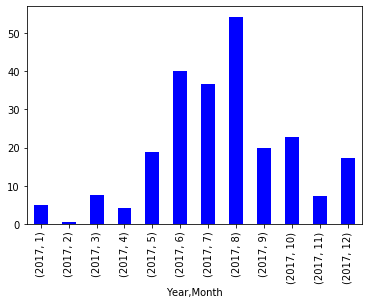

In [14]:
turbine_2017 = turbine[turbine.index.year == 2017]
grmonth=turbine_2017.groupby(['Year','Month']).sum()['Curtail']/(1000*60)
grmonth2=turbine_2017.groupby(['Year','Month']).sum()['Power_kw']/(1000*60)
grmonth.plot.bar(color='blue')

In [15]:
turbine_2017.groupby(['Year','Month']).sum()

Power_kw   Setpoint_kw        Wind_ms  Fitted Power  \
Year Month                                                            
2017 1      2.435203e+07  3.944590e+07  535380.233222  1.629638e+07   
     2      2.128750e+07  3.618251e+07  473997.388258  1.190228e+07   
     3      2.031613e+07  3.861934e+07  473602.271446  1.429778e+07   
     4      6.864094e+06  1.172402e+07  148049.693095  5.723156e+06   
     5      1.204268e+07  3.712950e+07  345127.400775  1.285840e+07   
     6      1.240393e+07  3.376933e+07  377188.920690  1.320894e+07   
     7      9.177630e+06  3.659062e+07  332015.503278  1.084768e+07   
     8      1.061903e+07  3.579635e+07  346924.356127  1.398902e+07   
     9      1.478186e+07  3.519698e+07  406581.536686  1.422039e+07   
     10     2.137572e+07  3.705941e+07  537867.337751  1.479744e+07   
     11     2.747355e+07  3.765885e+07  571992.251744  1.659902e+07   
     12     2.270570e+07  3.757999e+07  534113.258778  1.634189e+07   

                 Curtail     Day  Weekday  
Year Month                                 
2017 1      2.900853e+05  714240   131040  
     2      1.923599e+04  584640   120960  
     3      4.550475e+05  714240   133920  
     4      2.396316e+05  669600   136800  
     5      1.128415e+06  714240   125280  
     6      2.410211e+06  669600   131040  
     7      2.202313e+06  714240   136800  
     8      3.262560e+06  714240   129600  
     9      1.199547e+06  669600   133920  
     10     1.362761e+06  714240   131040  
     11     4.356767e+05  669600   128160  
     12     1.040873e+06  714240   142560

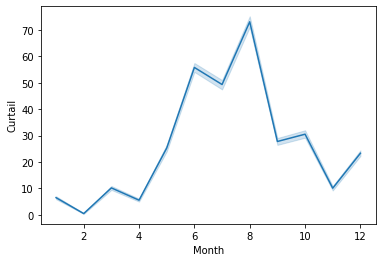

In [16]:
#Examine the pattern of Curtailed energy for 2017
sns.lineplot(x="Month", y="Curtail", data=turbine_2017)


#### 2016:

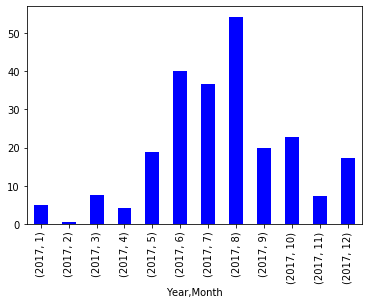

In [17]:
turbine_2016 = turbine[turbine.index.year == 2016]
grmonth_2016=turbine_2016.groupby(['Year','Month']).sum()['Curtail']/(1000*60)
grmonth2_2016=turbine_2016.groupby(['Year','Month']).sum()['Power_kw']/(1000*60)
grmonth.plot.bar(color='blue')

In [18]:
turbine_2016.groupby(['Year','Month']).sum()

Power_kw   Setpoint_kw        Wind_ms  Fitted Power  \
Year Month                                                            
2016 1      2.250938e+07  3.759116e+07  566867.868873  1.131060e+07   
     2      1.911036e+07  3.730413e+07  438922.761993  1.536036e+07   
     3      1.362860e+07  3.856286e+07  360919.769601  1.398525e+07   
     4      1.165681e+07  3.152451e+07  416547.150540  1.449604e+07   
     5      8.776190e+06  3.583316e+07  329715.688672  1.192049e+07   
     6      8.009316e+06  3.245484e+07  306096.493348  1.161999e+07   
     7      1.017194e+07  3.161906e+07  321274.224074  1.259632e+07   
     8      1.015350e+07  2.744451e+07  391129.695342  1.334577e+07   
     9      1.041796e+07  2.570803e+07  384702.468454  1.256245e+07   
     10     1.136005e+07  3.213184e+07  415651.111425  1.340872e+07   
     11     1.450585e+07  2.960782e+07  466030.518802  1.283701e+07   
     12     2.094677e+07  3.860791e+07  503904.217647  1.552971e+07   

                 Curtail     Day  Weekday  
Year Month                                 
2016 1      3.327497e+05  714239   142556  
     2      3.206859e+03  626400   120960  
     3      1.113666e+06  714240   129600  
     4      2.996286e+06  669600   133920  
     5      3.038641e+06  714240   131040  
     6      3.353068e+06  669600   128160  
     7      2.298390e+06  714240   142560  
     8      4.806226e+06  714240   125280  
     9      3.883974e+06  669600   131040  
     10     3.808782e+06  714240   136800  
     11     3.639998e+06  669600   125280  
     12     1.287017e+05  714240   138240

#### Part 1(g):  Setpoint forecasting error curtailment per turbine 

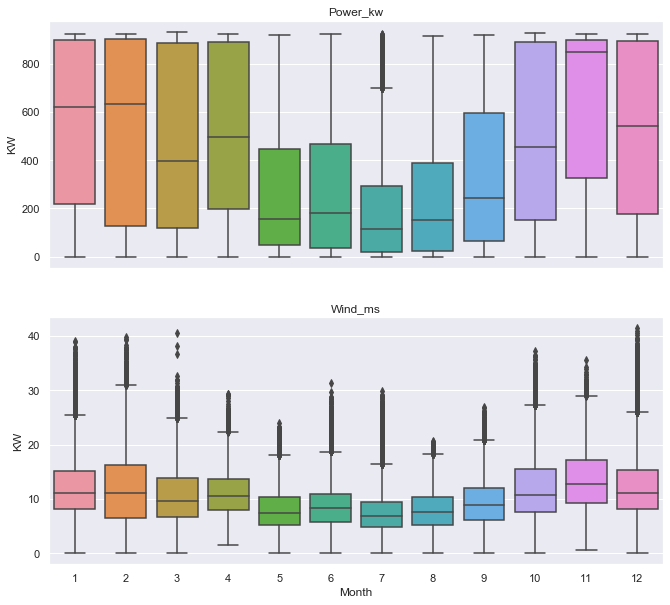

In [19]:
# display power and wind characteristics during 2017

#Plots
sns.set(rc={'figure.figsize': (11,4)})
fig, axes = plt.subplots(2,1,figsize=(11,10), sharex=True)
for name, ax in zip(['Power_kw','Wind_ms'], axes):
    sns.boxplot(data=turbine_2017, x ='Month', y = name, ax=ax)
    ax.set_ylabel('KW')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

#### Setpoint forecasting error curtailment for one turbine during 2017

In [20]:
# annual curtailment for 2017 per turbine
print(grmonth[:])
print('\nCurtailment for 2017 per turbine:',round(np.sum(grmonth),0), '(MWH)')
print('Curtailment for 2016 per turbine:',round(np.sum(grmonth_2016),0), '(MWH)')
print('Annual Curtailment per turbine in 2016 and 2017:', round((np.sum(grmonth)+np.sum(grmonth_2016))/2,0), '(MWH)')

Year  Month
2017  1         4.834755
      2         0.320600
      3         7.584125
      4         3.993861
      5        18.806917
      6        40.170184
      7        36.705217
      8        54.376006
      9        19.992453
      10       22.712683
      11        7.261278
      12       17.347886
Name: Curtail, dtype: float64

Curtailment for 2017 per turbine: 234.0 (MWH)
Curtailment for 2016 per turbine: 490.0 (MWH)
Annual Curtailment per turbine in 2016 and 2017: 362.0 (MWH)


#### Setpoint forecasting error curtailment for all turbines for years 2016 and 2017
Based on below article, we read that total capacity in Orkney islands is 70MW , therefore if all turbines are same, this implies a total number of roughly 77 turbines. For analysis in this report, we will therefore assume a total number of 77 turbines.

Source: [https://www.euislands.eu/island/orkney]


In [21]:
print('Curtailment for 2017 for 77 turbine:',round(np.sum(grmonth)*77,0), '(MWH)')
print('Curtailment for 2016 for 77 turbine:',round(np.sum(grmonth_2016)*77,0), '(MWH)')
print('Annual Curtailment for 77 turbines in 2016 and 2017:', round((np.sum(grmonth)+np.sum(grmonth_2016))*77/2,0), '(MWH)')

Curtailment for 2017 for 77 turbine: 18026.0 (MWH)
Curtailment for 2016 for 77 turbine: 37735.0 (MWH)
Annual Curtailment for 77 turbines in 2016 and 2017: 27880.0 (MWH)


## Part 2

### Question 2: How much can this be reduced by different levels of DR penetration?

The purpose of the DR scheme is to store energy when it is produced so that it can be consumed at a later point in time. Here we are trying to achieve the reduction in the curtailed energy, defined  as residual_curtail, by utilising storage heaters and hot water cylinders, in order to allow energy consumption that would otherwise have been curtailed from the local wind generators. 

We first check how the demand of energy varies throughout the day. We also plot the demand versus the number of households during 2017, as well as the average demand. We do this in order to notice any spikes or patterns during this year.
We noticed the spike in demand in September is driven by a sudden increase in the number of households, and this is likely to be caused by the international events at the begining of September.

We then check penetration levels, defined as the % of energy that would have been used during peak times but this energy need is now 'transferred' to off peak times. Peak times are betwen 16:00h and 21:00h (*although in the function the parameter is 20, it indicates the period of 20:00 - 21:00*). We decide that a penetration level of 20% is optimal, which implies that 20% of peak demand can be transferred and smoothen the energy consumption during the day.

We continue with a comparison of the local annual demand from households (defined as mean demand * chosen # of households) with the total curtailed power for year 2017. Our goal is to determine the optimal number of households to be used in the DR scheme. For the DR scheme we are also able to choose a smaller number of turbines, for which the set point is always set to its maximum. 

We examine the number of households required to utilise the curtailed energy of all 77 900KW turbines. We found that the demand from approximately 10000 households can be satisfied by the curtailed energy prodcued by the 77 turbines. We also anticpate that with such a trial we want to reduce the number of households to reduce risk of failure and operational costs. We reduced the number of households to 6500 as the demand is satisfied by the curtailed energy by September. This implies that if the curtailed energy could be stored in a solution such as Lithium batteries (detailed explanation below) these 6500 households would have energy stored for the colder winter months during the first 9 months of the year excluding operational costs so their energy payments would be zero for the final 3 months of the year. We can use the same principle and reduce the number of households to 3500 and have the full year energy demand supplied by curtailed energy by mid July. Reducing the households should reduce the costs associated with the trial.


#### Assumptions:
- We assume curtailed energy can be stored and used in the future (e.g. by using solid state batteries), and for this analysis we assume no cap to energy storage, although in reality we know the batteries (or alternative storage system) will have a max capacity, beyond which energy generated cannot be stored and will be wasted. 
- We are using the 2017 data, in order to match the demand and turbine data
- We understand that the local households also use other sources of energy eg. fossil fuel, depending on their demands. However, if energy can be stored and not wasted, it can be used locally by a certain number of households at a later point in time, and as a result reduce utilisation of other sources of energy. For example, these households that participate in the DR scheme can utilise energy during off peak hours, and smoothe the energy consumption across the islands.
- We have been advised that the local demand is not limited to the demand data provided, and therefore we assume that any additional energy can actually be utilised by local households.
- The more households used, the less energy is wasted, which means that the turbines can operate at optimal level without manual restrictions. We need to note here that we cannot use all the households  because (a) we refer only to the excess energy produced, and not the total energy, (b) the costs involved in the scheme are not negligible, (c) during the test period, curtailed energy used is offered at zero or low cost to locals


#### Our suggestions:
- Hourly Pricing (HP) strategy is for reducing the price of non-peak time usage and penalising the price of peak time usage, which has been proved most effective comparing to other methods [2][3]. 
-  20% level of DR penetration provide the optimal storage curtailment reduction based on 5% interval testing.
- Revenue produced by suggested DR penetration: £32,372  (based on an assumption that 4,000 kwh is priced at 700 GBP)
- As part of the DR management, we can approach the local factories to shut down (at least some of their machines) during the spike in demand in September as a result of international events. They can carry on machine maintenance during the shut down period. In return, we can pass on some of the revenue or cost savings from not having to source alternative energy (e.g. coal).
- Begin trail with approximately 3500 households leveraging curtailed energy to satisfy full year demand by July and using a storage solution such as Lithium solid state batteries to store energy.

#### Part  2(a): Check energy demand during 2017

Determine optimal penetration levels

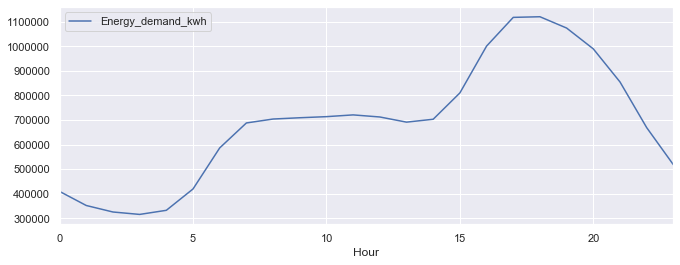

In [22]:
demand['Hour']= demand.index.hour
demand['Energy_demand_kwh'] = demand.Demand_mean_kw*demand.N_households*0.5

#Peak hour during 16:00 - 20:00 
demand.groupby('Hour').sum().plot(y='Energy_demand_kwh')

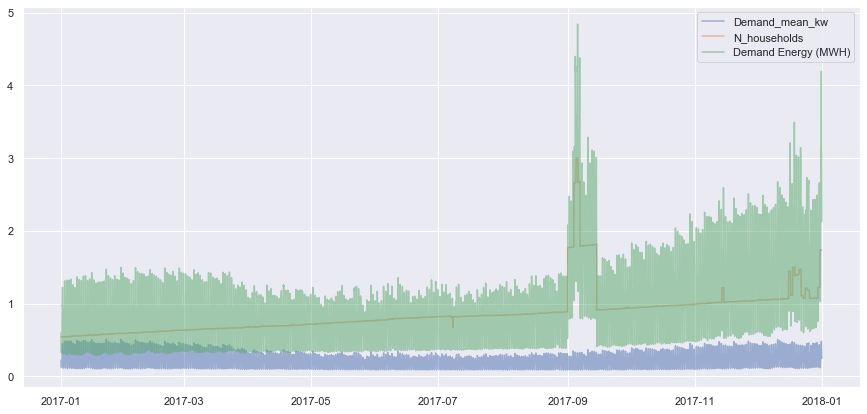

In [23]:
demand_2017=demand[demand.index.year==2017]

plt.figure(figsize=(15,7))
plt.plot(demand_2017.index, demand_2017["Demand_mean_kw"], label='Demand_mean_kw', alpha=0.5)

#rescale N-households so we can investigate patterns
plt.plot(demand_2017.index, demand_2017["N_households"]/10000, label='N_households', alpha=0.5)
plt.plot(demand_2017.index, demand_2017["Demand_mean_kw"]*demand_2017["N_households"]*30/60/1000, 
         label='Demand Energy (MWH)', alpha=0.5)

plt.legend()
plt.show()

#####  Observation and DR strategy
The above graph shows that the average demand remained stable throughout the year, the spike in September was caused by a sudden increase in the number of households. There were several events, including an international science festival, in the Orkney area at the beginning of September, so this is likely to be the cause of this sudden increase in the number of households. 

As part of the demand response (DR) programme, we should consider approaching the local factories so they can shut down some of their machines during this event to reduce the stress on the grid. In return, we can pass on some of the revenue from not having to source alternative energy (e.g. coal). They can carry on machine maintenance during the shut down period. 

#### Part  2(b): Determine optimal penetration levels

In [24]:
def DR_penetration(df,level):
    demand = df.copy()
    total_original_peak_demand = demand[(demand.Hour >= 16) & (demand.Hour <= 20)].sum()['Energy_demand_kwh']
    print('total_original_peak_demand:',total_original_peak_demand)
    total_original_non_peak_demand = demand.sum()['Energy_demand_kwh']-total_original_peak_demand
    print('total_original_non_peak_demand:',total_original_non_peak_demand)
    transfered_demand = total_original_peak_demand*level
    print('transfered_demand:',transfered_demand)
    percentage_non_peak_increased = transfered_demand/total_original_non_peak_demand
    print('percentage_non_peak_increased:',percentage_non_peak_increased)
    
    
    demand['DR_p'] = demand.loc[(demand.Hour >= 16) & (demand.Hour <= 20)].Energy_demand_kwh* (1-level)
    demand['DR_np'] = demand.loc[(demand.Hour <= 15) | (demand.Hour >= 21)].Energy_demand_kwh* (1+percentage_non_peak_increased)
    demand['DR_'+str(level)] = demand['DR_p'].fillna(demand['DR_np']) 
                               
    return demand

In [25]:
demand_with_DR = demand
for level in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
    demand_with_DR = DR_penetration(demand_with_DR, level)

total_original_peak_demand: 5305089.7075000135
total_original_non_peak_demand: 11234496.510000031
transfered_demand: 265254.4853750007
percentage_non_peak_increased: 0.023610714119577395
total_original_peak_demand: 5305089.7075000135
total_original_non_peak_demand: 11234496.510000031
transfered_demand: 530508.9707500014
percentage_non_peak_increased: 0.04722142823915479
total_original_peak_demand: 5305089.7075000135
total_original_non_peak_demand: 11234496.510000031
transfered_demand: 795763.456125002
percentage_non_peak_increased: 0.07083214235873217
total_original_peak_demand: 5305089.7075000135
total_original_non_peak_demand: 11234496.510000031
transfered_demand: 1061017.9415000028
percentage_non_peak_increased: 0.09444285647830958
total_original_peak_demand: 5305089.7075000135
total_original_non_peak_demand: 11234496.510000031
transfered_demand: 1326272.4268750034
percentage_non_peak_increased: 0.11805357059788696
total_original_peak_demand: 5305089.7075000135
total_original_non_pe

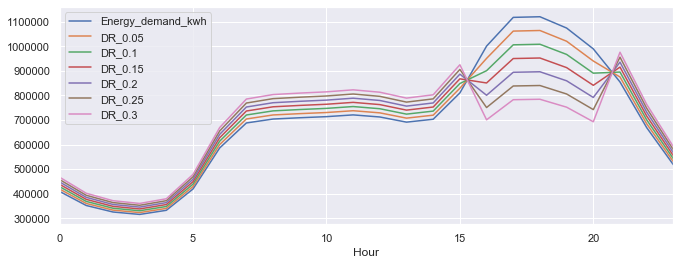

In [26]:
demand_with_DR.groupby('Hour').sum().plot(y=['Energy_demand_kwh','DR_0.05','DR_0.1','DR_0.15','DR_0.2','DR_0.25','DR_0.3'])

#### Findings: 
As we asssumed that the wind turbine company needs to remain the hourly peak usage level for unpredicted high energy usage event, the hourly peak usage would be the amount of energy to be stored. The storage curtailment is defined as the opportunity cost between original plan and after implementing DR penetration. Since the original peak value is certain, we should choose the lowest new peak level to ensure that the enough energy the wind turbine company remains is equal to the new peak point. As presented in curtailed energy list for 5% testing interval, 20% DR penetration level produce the largest curtailed energy. Based on comparing the new peak value, we choose DR leve equal to 20% which produces the lowest new peak value. Based on the observation of the DR graph, the ideal optimal DR level should be 20% by testing 5% DR level interval from 5% to 30%. If the level increase to 25%, the max usage during non-peak time would be higher and thus producing new storage curtailment.

In [27]:
original_peak = demand_with_DR.groupby('Hour').sum()['Energy_demand_kwh'].max()
print('original peak:',original_peak,'(kwh)')

original peak: 1120876.5195000004 (kwh)


In [28]:
print('DR level=5%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.05'].max())
print('DR level=10%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.1'].max())
print('DR level=15%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.15'].max())
print('DR level=20%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.2'].max())
print('DR level=25%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.25'].max())
print('DR level=30%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.3'].max())

print ('The lowest new peak point:',demand_with_DR.groupby('Hour').sum()['DR_0.2'].max(), 'for 20% DR level.')

DR_5 = demand_with_DR.groupby('Hour').sum()['DR_0.05'].max()
DR_10 = demand_with_DR.groupby('Hour').sum()['DR_0.1'].max()
DR_15 = demand_with_DR.groupby('Hour').sum()['DR_0.15'].max()
DR_20 = demand_with_DR.groupby('Hour').sum()['DR_0.2'].max()
DR_25 = demand_with_DR.groupby('Hour').sum()['DR_0.25'].max()
DR_30 = demand_with_DR.groupby('Hour').sum()['DR_0.3'].max()


DR level=5%, the new peak: 1064832.6935249995
DR level=10%, the new peak: 1008788.8675500002
DR level=15%, the new peak: 952745.0415749996
DR level=20%, the new peak: 935889.6267760628
DR level=25%, the new peak: 956079.8288450768
DR level=30%, the new peak: 976270.0309140931
The lowest new peak point: 935889.6267760628 for 20% DR level.


In [29]:
print('Curtailed energy in 5% DR level:',original_peak-DR_5)
print('Curtailed energy in 10% DR level:',original_peak-DR_10)
print('Curtailed energy in 15% DR level:',original_peak-DR_15)
print('Curtailed energy in 20% DR level:',original_peak-DR_20)
print('Curtailed energy in 25% DR level:',original_peak-DR_25)
print('Curtailed energy in 30% DR level:',original_peak-DR_30)

Curtailed energy in 5% DR level: 56043.82597500086
Curtailed energy in 10% DR level: 112087.6519500002
Curtailed energy in 15% DR level: 168131.47792500083
Curtailed energy in 20% DR level: 184986.89272393764
Curtailed energy in 25% DR level: 164796.69065492356
Curtailed energy in 30% DR level: 144606.48858590727


Thus, 20% DR level produce the largest curtailed energy.

In [30]:
original_peak = demand_with_DR.groupby('Hour').sum()['Energy_demand_kwh'].max()
print('original peak:',original_peak,'(kwh)')

new_peak = demand_with_DR.groupby('Hour').sum()['DR_0.2'].max()
print('new peak:',new_peak,'(kwh)')

print ('Energy annually saved from storage curtailment:', (original_peak - new_peak), '(kwh)')
print( 'or:', (original_peak - new_peak)/1000, 'mwh')

original peak: 1120876.5195000004 (kwh)
new peak: 935889.6267760628 (kwh)
Energy annually saved from storage curtailment: 184986.89272393764 (kwh)
or: 184.98689272393764 mwh


#### Revenue generated by suggested level of  DR penetration

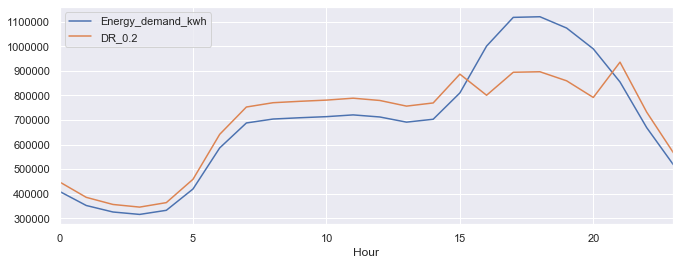

In [31]:
demand_with_DR.groupby('Hour').sum().plot(y=['Energy_demand_kwh','DR_0.2'])

In [32]:
print('Revenue produced by DR penetration:',(original_peak - new_peak)/4000*700, 'GBP')

Revenue produced by DR penetration: 32372.706226689086 GBP


#### Part 2(c): Check the % of the curtailed energy that can be utilised by a specific number of households

 Assumptions:
- We exclude from the calculations the 40MW cable to mainland for simplicity. 
- For this part we check the outcome if we leave the set point to its maximum for 100% and 50% of the available turbines, which is 38 turbines.
- We are using the 2017 data, in order to match the demand and turbine data

In [33]:
resampled_turbine = turbine.resample('30T').mean()
resampled_turbine_2017 = resampled_turbine[resampled_turbine.index.year == 2017]
resampled_turbine_2017.tail(2)

,Power_kw,Setpoint_kw,Wind_ms,Fitted Power,Curtail,Year,Month,Day,Weekday
2017-12-31 23:00:00,116.257778,900.0,6.181556,124.447039,0.0,2017,12,31,6
2017-12-31 23:30:00,50.508889,900.0,4.837778,49.709587,0.0,2017,12,31,6


#### Plot of residual curtail

Residual_curtail is defined as the difference between the total curtailed energy for a number of turbines and the demand from a specific number of households, at each point in time.

The plot below is using a hyppotherical number of households (10,000) and 50% of turbines are uncurtailed

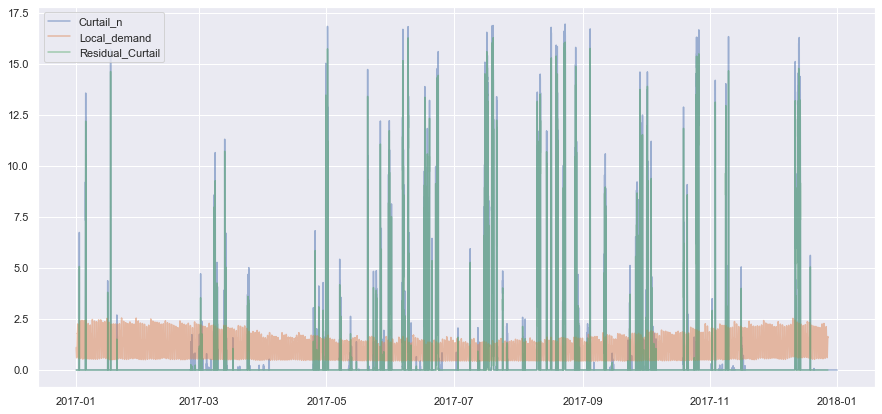

In [34]:
#use demand data for 2017 and make array equal to the turbine data
demand_2017 = demand[demand.index.year == 2017][:17306]

resampled_turbine_2017['Curtail_n'] = resampled_turbine_2017['Curtail'] 
resampled_turbine_2017['Power_kw_n'] = resampled_turbine_2017['Power_kw'] 
demand_2017['Date']=demand_2017.index

#sorting dates to avoid inconsistencies
resampled_turbine_2017['Date'] = resampled_turbine_2017.index
demand_2017 = demand_2017.sort_values(by='Date')
resampled_turbine_2017 = resampled_turbine_2017.sort_values(by='Date')

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

#assume a number of households 
n_houses, n_turbines = 10000, 38
plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Curtail_n"] * n_turbines/1000/2, label='Curtail_n', alpha=0.5)
plt.plot(demand_2017.index, demand_2017["Demand_mean_kw"] * n_houses/1000/2, label='Local_demand', alpha=0.5)

resampled_turbine_2017['Residual_curtail']=(resampled_turbine_2017["Curtail_n"] * n_turbines-demand_2017["Demand_mean_kw"] * n_houses)
resampled_turbine_2017['Residual_curtail'] =np.where(resampled_turbine_2017['Residual_curtail'] < 0, 0, 
                                                     resampled_turbine_2017['Residual_curtail'])
plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Residual_curtail"]/1000/2, label='Residual_Curtail', alpha=0.5)


plt.legend()
plt.show()

#### Findings:

The graph above shows that curtailed energy can have big deviations from demand, at certain points.This energy, if produced but not stored, will be lost leading to both a monetary and community loss.

#### Examine difference of demand and total curtailed energy for a hypothetical number of households  and 100% or 50% of the available turbines (the latter implying that we unrestrict only 50% of the turbines)

In [35]:
n_houses, n_turbines = 2000, 38
a = np.sum(resampled_turbine_2017["Curtail"]*n_turbines)
c = np.sum(demand_2017["Demand_mean_kw"])*n_houses
#how much of the curtailed energy is used from n number of households within 2017
print("Extraction of curtailed energy for 2000 households and 50% of uncurtailed turbines = ",(c)/a)

n_houses, n_turbines = 2000, 77
a = np.sum(resampled_turbine_2017["Curtail"]*n_turbines)
c = np.sum(demand_2017["Demand_mean_kw"])*n_houses
#how much of the curtailed energy is used from n number of households within 2017
print("Extraction of curtailed energy for 2000 households and 100% of uncurtailed turbines = ",(c)/a)

Extraction of curtailed energy for 2000 households and 50% of uncurtailed turbines =  0.42436794739548894
Extraction of curtailed energy for 2000 households and 100% of uncurtailed turbines =  0.20942833767569585


#### Check the % of the curtailed energy that can be utilised by x number of households, assuming 100% uncurtailed turbines

In [36]:
#assume a number of households 

n_turbines = 77
for n_houses in range(0, 10500, 500):
    #resampled_turbine_2017['Residual_curtail']=resampled_turbine_2017["Curtail_n"] * n_turbines-demand_2017["Demand_mean_kw"] * n_houses
    #
    #resampled_turbine_2017['Residual_curtail'] =np.where(resampled_turbine_2017['Residual_curtail'] < 0, 0, 
                                                     #resampled_turbine_2017['Residual_curtail'])

    a = np.sum(resampled_turbine_2017["Curtail"]*n_turbines)
    c = np.sum(demand_2017["Demand_mean_kw"])*n_houses

#how much of the curtailed energy is used from n number of households within 2017
    print("Extraction of curtailed energy for "+str(n_houses)+ " households  "+ str(round((c)/a,3)))


Extraction of curtailed energy for 0 households  0.0
Extraction of curtailed energy for 500 households  0.052
Extraction of curtailed energy for 1000 households  0.105
Extraction of curtailed energy for 1500 households  0.157
Extraction of curtailed energy for 2000 households  0.209
Extraction of curtailed energy for 2500 households  0.262
Extraction of curtailed energy for 3000 households  0.314
Extraction of curtailed energy for 3500 households  0.366
Extraction of curtailed energy for 4000 households  0.419
Extraction of curtailed energy for 4500 households  0.471
Extraction of curtailed energy for 5000 households  0.524
Extraction of curtailed energy for 5500 households  0.576
Extraction of curtailed energy for 6000 households  0.628
Extraction of curtailed energy for 6500 households  0.681
Extraction of curtailed energy for 7000 households  0.733
Extraction of curtailed energy for 7500 households  0.785
Extraction of curtailed energy for 8000 households  0.838
Extraction of curtai

#### Findings:
From data above we see the percentage of curtailed energy that would be utilised by x number of households, ultimately we see whether this curtailed energy could satisfy in full certain number of households, assuming that no energy is curtailed or lost, and assuming that unlimited storage capabilities.

We can see the cumaltive curtailed energy from 77 turbines and 10000 houesholds below: 


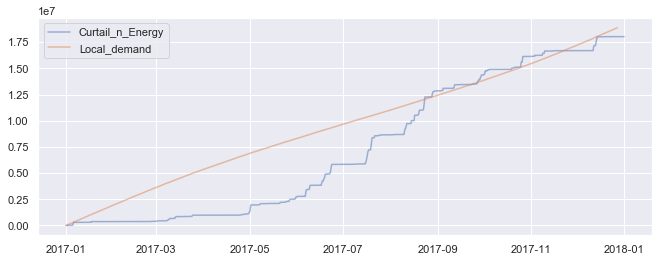

In [87]:
#Define demand for all households
demand_2017["Local_demand"]=demand_2017["Demand_mean_kw"] * demand_2017["N_households"]
#assume a number of households
n_houses, n_turbines = 10000, 77
Local_demand_2017 = demand_2017["Local_demand"].sum()
# plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Power_kw_n"], label='Power_kw_n', alpha=0.5)
plt.plot(resampled_turbine_2017.index,(resampled_turbine_2017["Curtail_n"].cumsum() * n_turbines) /2, label='Curtail_n_Energy', alpha=0.5)
plt.plot(demand_2017.index, demand_2017["Demand_mean_kw"].cumsum() * n_houses/2, label='Local_demand', alpha=0.5)
#plt.axhline(y=Local_demand_2017, color='r', linestyle='-', label= 'Total_local_demand')
#resampled_turbine_2017['Residual_curtail']=resampled_turbine_2017["Curtail_n"] * n_turbines -demand_2017["Demand_mean_kw"] * n_houses
#resampled_turbine_2017['Residual_curtail'] =np.where(resampled_turbine_2017['Residual_curtail'] < 0, 0,
                                                   #resampled_turbine_2017['Residual_curtail'])
#plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Residual_curtail"], label='Residual_Curtail', alpha=0.5)
plt.legend()
plt.show()

We can see above that if we plot the local average demand for 10,000 households against the curtailed energy of 1.78 (scaled)KWH from 77 turbines during a 12 month period we satsify the local demand.  

We can also observe that the curtailed energy does not exceed the demand until September and then drops below during December which means this would be an energy supply solution for the following year. The curtailed energy could be stored through the use of solid-state batteries which provide a reliable source of long-term storage for wind energy. According to Claire Curry's,Lithium Iron Batteries: Costs and Market "BNEF forecasts lithium-ion battery pack prices will continue to fall". Companies such as Power Vault proivide intelligent battery system for the modern smart home, designed to maximise energy efficiency and value for the each household. The energy can then be released through the in home batteries to the 10,000 households. Given the limited time contraints and data we have access to we are unable to quantify such a scenario.

In our view, one way to reduce such cost is by reducing the number of households for the test period to less than 50% of the average number, as there is a cost involved in storage of energy and also during the test period energy is provided at no cost.




#### Part 2(d) Cumalitive Curtail Over Time (Set no. of Households and all 77 Turbines): Examine a rough optimal match between the demand of n households and the curtailed energy of n turbines of 2017

In 2a) we see a sharp increase in demand, spiking in September (which believe we have isolated why above) but logic would say that the demand for energy will increase during the winter months. Another approach would be to examine how many turbines would meet the needs of say the last 3 months of the year during the first 9 to remove the requirement for traditonal energy sources. Using what would be curtailed to then be stored and used for remainder of the year and then whats left from the 77 could then be either be further stored or package pack to the mainland at an agreed rate.




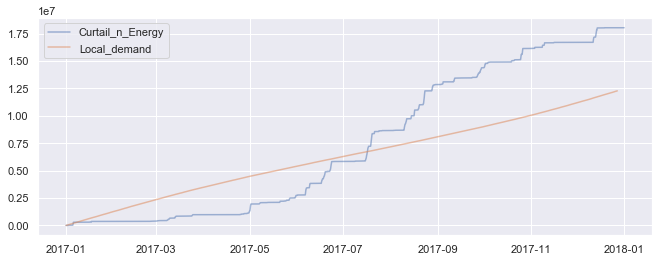

In [94]:
#Define demand for all households
demand_2017["Local_demand"]=demand_2017["Demand_mean_kw"] * demand_2017["N_households"]
#assume a number of households
n_houses, n_turbines = 6500, 77
Local_demand_2017 = demand_2017["Local_demand"].sum()
# plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Power_kw_n"], label='Power_kw_n', alpha=0.5)
plt.plot(resampled_turbine_2017.index,(resampled_turbine_2017["Curtail_n"].cumsum() * n_turbines) /2, label='Curtail_n_Energy', alpha=0.5)
plt.plot(demand_2017.index, demand_2017["Demand_mean_kw"].cumsum() * n_houses/2, label='Local_demand', alpha=0.5)
#plt.axhline(y=Local_demand_2017, color='r', linestyle='-', label= 'Total_local_demand')
#resampled_turbine_2017['Residual_curtail']=resampled_turbine_2017["Curtail_n"] * n_turbines -demand_2017["Demand_mean_kw"] * n_houses
#resampled_turbine_2017['Residual_curtail'] =np.where(resampled_turbine_2017['Residual_curtail'] < 0, 0,
                                                   #resampled_turbine_2017['Residual_curtail'])
#plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Residual_curtail"], label='Residual_Curtail', alpha=0.5)
plt.legend()
plt.show()

We can see that the curtailed energy for 77 turbines satisfies the the full year local demand for 6500 households by the end of September. If this curtailed energy was to be stored through the first 9 months of the year it could then be used to power the 6500 households during the final 3 months of the year. Approximately 1.25 (scaled) KWH of energy out of 1.78 (scaled) KWH total leaving .5 (scaled) KWH remaining. According to an article on www.moneyadviceservices.org.uk the average consumption of yearly energy in 4000 KWH / year which costs the average household approximately £700. To minimise cost and maximise revenue the remaining energy should be package back to the grid at a reduced rate.







Such a role out would be be operational less costly if the number of house were to be reduced due to the expected fixed cost for equipment such as storage and maintenance. If we further reduce the number of houses involved in the scheme  to 3500 we can see that the total demand of approximatly 0.6 (scaled) KWH is met by the cumalitive curtailed energy up until mid July.


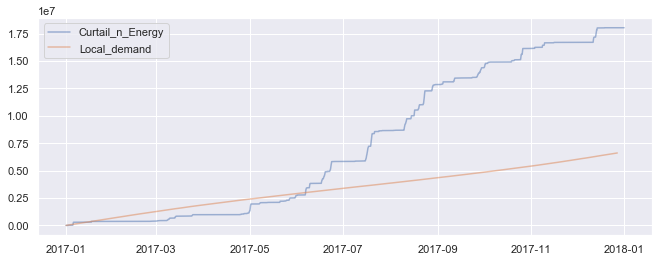

In [95]:
#Define demand for all households
demand_2017["Local_demand"]=demand_2017["Demand_mean_kw"] * demand_2017["N_households"]
#assume a number of households
n_houses, n_turbines = 3500, 77
Local_demand_2017 = demand_2017["Local_demand"].sum()
# plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Power_kw_n"], label='Power_kw_n', alpha=0.5)
plt.plot(resampled_turbine_2017.index,(resampled_turbine_2017["Curtail_n"].cumsum() * n_turbines) /2, label='Curtail_n_Energy', alpha=0.5)
plt.plot(demand_2017.index, demand_2017["Demand_mean_kw"].cumsum() * n_houses/2, label='Local_demand', alpha=0.5)
#plt.axhline(y=Local_demand_2017, color='r', linestyle='-', label= 'Total_local_demand')
#resampled_turbine_2017['Residual_curtail']=resampled_turbine_2017["Curtail_n"] * n_turbines -demand_2017["Demand_mean_kw"] * n_houses
#resampled_turbine_2017['Residual_curtail'] =np.where(resampled_turbine_2017['Residual_curtail'] < 0, 0,
                                                   #resampled_turbine_2017['Residual_curtail'])
#plt.plot(resampled_turbine_2017.index, resampled_turbine_2017["Residual_curtail"], label='Residual_Curtail', alpha=0.5)
plt.legend()
plt.show()

## Part 3

###  Question 3: How many local households would need to be on our DR scheme in order to supply this level of DR?

#### Summary of the subsection:

As this report is for the initial research of whether the company is worth investigating further on this topic, we are not focusing on optimising the solution. To simplify the problem, we make two assumptions.

#### 1. Conservative assumption (realistic):

Heating and cooling in energy consumption contribute a significant share (50 % in 2014) of the European Union’s (EU) total energy demand [4]. 

Thus, we make an assumption:
- people joined DR scheme would follow the scheme in most of the time. Then households in this plan would not use energy which can be storaged before or after peak time (50% of the total usage by estimated). 

In this case, the conservative assumption requires twice number of households of the aggressive assumption to join.

#### 2. The number of households is gradually increasing except in Sept. the number jump to the highest point dramatically and then decrease to normal level. As in this report we tend to be conservative, we use the average number of household including the Sept. period to evaluate how many households should be included in the DR scheme.

In [39]:
demand_with_DR.head()

,Demand_mean_kw,N_households,Hour,Energy_demand_kwh,DR_p,DR_np,DR_0.05,DR_0.1,DR_0.15,DR_0.2,DR_0.25,DR_0.3
Timestamp,,,,,,,,,,,,
2017-01-01 00:00:00,0.220106,5428,0,597.3690,NaN,681.994852,611.473309,625.577617,639.681926,653.786235,667.890543,681.994852
2017-01-01 00:30:00,0.205945,5429,0,559.0380,NaN,638.233718,572.237286,585.436573,598.635859,611.835146,625.034432,638.233718
2017-01-01 01:00:00,0.189090,5429,1,513.2845,NaN,585.998582,525.403514,537.522527,549.641541,561.760554,573.879568,585.998582
2017-01-01 01:30:00,0.173118,5429,1,469.9290,NaN,536.501156,481.024359,492.119719,503.215078,514.310437,525.405796,536.501156
2017-01-01 02:00:00,0.159051,5429,2,431.7430,NaN,492.905563,441.936761,452.130521,462.324282,472.518042,482.711803,492.905563


In [40]:
# Arround 1295 households should be in the DR plan based on the aggressive assumption
demand_with_DR.DR_p.sum()

3713562.79525

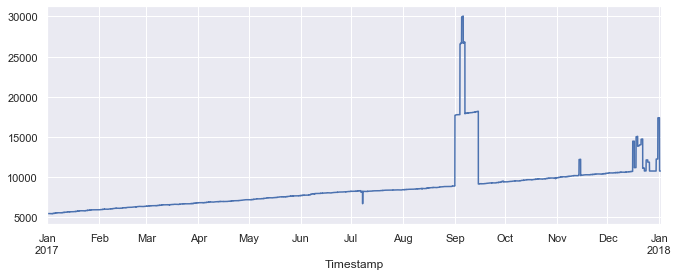

In [41]:
demand_with_DR.N_households.plot()

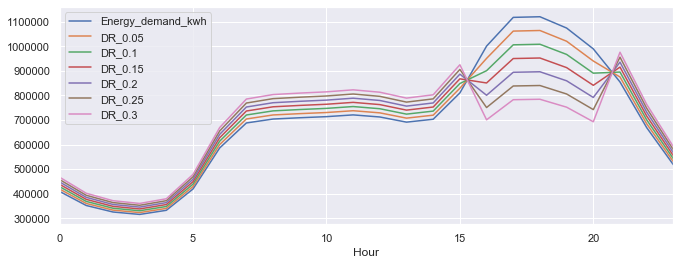

In [42]:
demand_with_DR.groupby('Hour').sum().plot(y=['Energy_demand_kwh','DR_0.05','DR_0.1','DR_0.15','DR_0.2','DR_0.25','DR_0.3'])

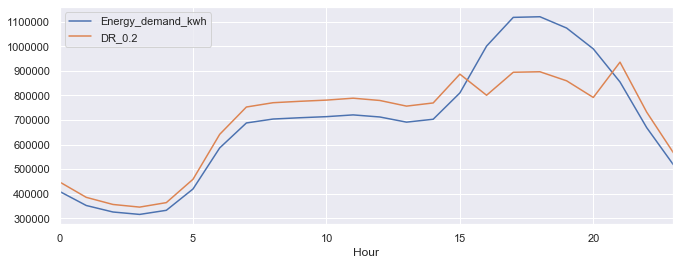

In [43]:
demand_with_DR.groupby('Hour').sum().plot(y=['Energy_demand_kwh','DR_0.2'])

In [44]:
print('Mean of num of households:',demand_with_DR.N_households.mean())

Mean of num of households: 8630.642133424408


In [45]:
Energy_usage_peak_per_household = demand_with_DR.DR_p.sum()/demand_with_DR.N_households.mean()
print('Mean energy used in peak time for each household:',Energy_usage_peak_per_household)

Mean energy used in peak time for each household: 430.2765353771606


In [46]:
# Arround 3452households should be in the DR plan based on the conservative assumption
print('Number of households needed in DR scheme:',demand_with_DR.DR_p.sum()*0.2/(Energy_usage_peak_per_household*0.5))

Number of households needed in DR scheme: 3452.256853369763


In [47]:
32372-5*3452

15112

At least 3452 households with 50% of peak time energy usage for heating and cooling system need to be on our DR scheme in order to supply 20% level of DR penetration.

####  Pricing Strategy

The whole revenue gained from 20% DR penetration is £32,372, which is assumed to gain for free. We can be divided the money into two parts: 
1. For people who join the DR scheme, the company offers a 5 GBP discount. For £3,452 required in the scheme, £17,260 is required to attract enough local households.
2. The rest £15,112 is for the revenue of the company.

####  Results

1.The 'turbine' dataset is with 1 min interval for each row. The wind speed range is from 0 to 43 m/s. The max of setpoint is 900 kw for the max capacity of the turbine. 


In [48]:
turbine.head()

,Power_kw,Setpoint_kw,Wind_ms,Fitted Power,Curtail,Year,Month,Day,Weekday
2016-01-01 00:01:00,901.833333,900.0,16.176667,0.0,0.0,2016,1,1,4
2016-01-01 00:02:00,904.200000,900.0,16.400000,0.0,0.0,2016,1,1,4
2016-01-01 00:03:00,906.233333,900.0,20.266667,0.0,0.0,2016,1,1,4
2016-01-01 00:04:00,901.300000,900.0,21.496667,0.0,0.0,2016,1,1,4
2016-01-01 00:05:00,898.233333,900.0,17.536667,0.0,0.0,2016,1,1,4


In [49]:
turbine.describe()

,Power_kw,Setpoint_kw,Wind_ms,Fitted Power,Curtail,Year,Month,Day,Weekday
count,1.008628e+06,1.008619e+06,1.008625e+06,1.052640e+06,1.052640e+06,1.052640e+06,1.052640e+06,1.052640e+06,1.052640e+06
mean,3.615274e+02,8.081778e+02,9.899227e+00,3.040500e+02,4.127721e+01,2.016499e+03,6.519836e+00,1.573871e+01,3.008204e+00
std,3.356735e+02,2.630564e+02,5.390414e+00,3.167511e+02,1.664956e+02,5.000017e-01,3.449553e+00,8.803925e+00,2.000670e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.000000e+01,9.000000e+02,6.058333e+00,1.251926e+01,0.000000e+00,2.016000e+03,4.000000e+00,8.000000e+00,1.000000e+00
50%,2.470000e+02,9.000000e+02,8.950000e+00,1.766706e+02,0.000000e+00,2.016000e+03,7.000000e+00,1.600000e+01,3.000000e+00
75%,6.818000e+02,9.000000e+02,1.234667e+01,5.370906e+02,0.000000e+00,2.017000e+03,1.000000e+01,2.300000e+01,5.000000e+00
max,9.312000e+02,9.000000e+02,4.378000e+01,8.994433e+02,8.994433e+02,2.018000e+03,1.200000e+01,3.100000e+01,6.000000e+00


2.From the box plot, we can see that from May to Sept, the power generated is quite low comparing to other months. The wind speed in the period is also slighly lower.

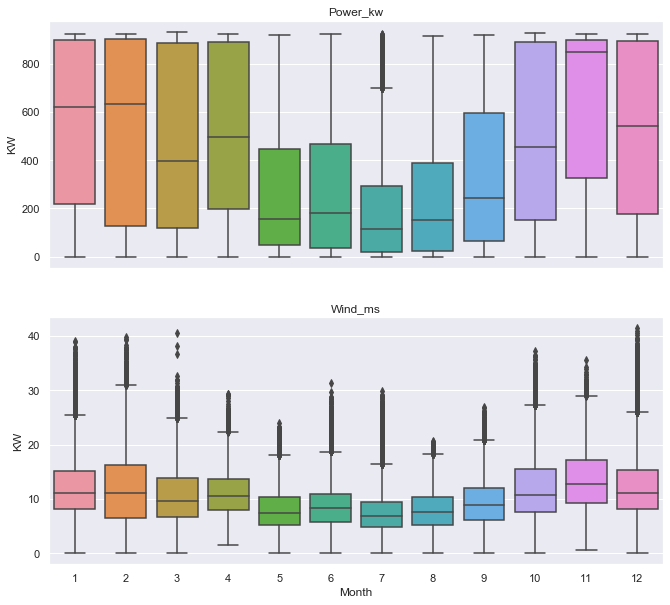

In [50]:
#Examine 2017

#Plots
sns.set(rc={'figure.figsize': (11,4)})
fig, axes = plt.subplots(2,1,figsize=(11,10), sharex=True)
for name, ax in zip(['Power_kw','Wind_ms'], axes):
    sns.boxplot(data=turbine_2017, x ='Month', y = name, ax=ax)
    ax.set_ylabel('KW')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

3.The curtailed energy is highest from June to Aug. This may be because of the setpoint forecasting error due to the low speed wind.

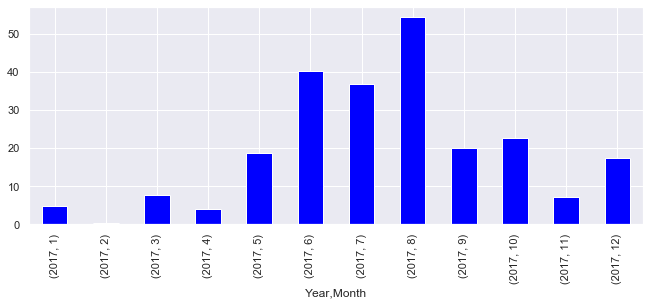

In [51]:
turbine_2017 = turbine[turbine.index.year == 2017]
grmonth=turbine_2017.groupby(['Year','Month']).sum()['Curtail']/(1000*60)
grmonth2=turbine_2017.groupby(['Year','Month']).sum()['Power_kw']/(1000*60)
grmonth.plot.bar(color='blue')

4.The 'demand' dataset is with 30 mins interval. The mean of the demand power for each household is 0.22 kw. The energy demand is with mean 941 kwh and max 4844 kwh. 

In [52]:
demand.head()

,Demand_mean_kw,N_households,Hour,Energy_demand_kwh
Timestamp,,,,
2017-01-01 00:00:00,0.220106,5428,0,597.3690
2017-01-01 00:30:00,0.205945,5429,0,559.0380
2017-01-01 01:00:00,0.189090,5429,1,513.2845
2017-01-01 01:30:00,0.173118,5429,1,469.9290
2017-01-01 02:00:00,0.159051,5429,2,431.7430


In [53]:
demand.describe()

,Demand_mean_kw,N_households,Hour,Energy_demand_kwh
count,17568.000000,17568.000000,17568.000000,17568.000000
mean,0.219090,8630.642133,11.500000,941.460964
std,0.090129,2999.141750,6.922384,511.933828
min,0.086607,5406.000000,0.000000,284.044000
25%,0.143592,6781.000000,5.750000,618.553125
50%,0.212315,8190.500000,11.500000,836.995250
75%,0.273678,9652.000000,17.250000,1138.273875
max,0.509662,30037.000000,23.000000,4844.088000


5.The number of households in Orkney gradually increased with a dramatic peak point in Sept and then back to normal level. This could be approaved by the demand curve as well.

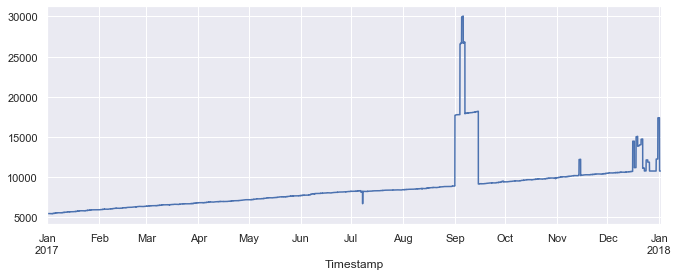

In [54]:
demand.N_households.plot()

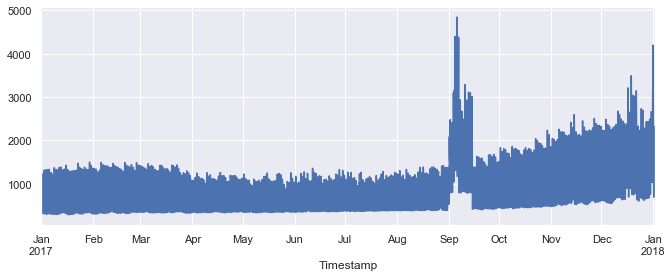

In [55]:
demand.Energy_demand_kwh.plot()

6.The curtailed energy by month reach a high level from June to Aug. As discussed, this may be the reason of setpoint forecasting error from low wind speed.

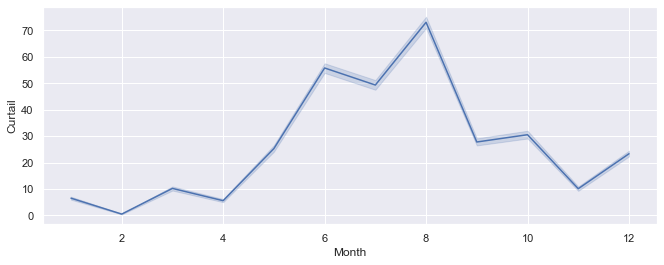

In [56]:
#Examine the pattern of Curtailed energy
sns.lineplot(x="Month", y="Curtail", data=turbine_2017)


7.We try to use functions to predict the power curve and power6 function performs the best.

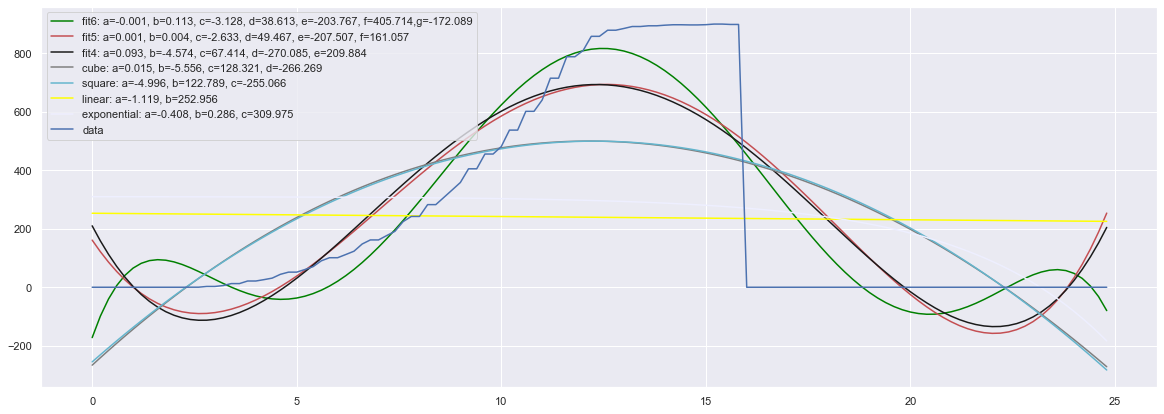

In [57]:
#fit different curves to data where setpoint=900
from scipy.optimize import curve_fit

def power6(x, a, b,c,d,e,f,g):
    return a * (x**6) + b * (x**5) + c * (x**4) + d * (x**3) + e * (x**2) + f*x+g
popt6, pcov6 = curve_fit(power6,x, y)

def power5(x, a, b,c,d,e,f):
    return a * (x**5) + b * (x**4) + c * (x**3) + d * (x**2) + e * (x) + f
popt5, pcov5 = curve_fit(power5,x, y)

def power4(x, a, b,c,d,e):
    return a * (x**4) + b * (x**3) + c * (x**2) + d * (x) + e 
popt4, pcov4 = curve_fit(power4,x, y)

def power3(x, a, b,c,d):
    return a * (x**3) + b * (x**2) + c * (x) + d  
popt3, pcov3 = curve_fit(power3,x, y)

def power2(x, a, b,c):
    return a * (x**2) + b * (x) + c 
popt2, pcov2 = curve_fit(power2,x, y)

def linear(x, a,b):
    return a * (x) + b 
popt1, pcov1 = curve_fit(linear,x, y)

def expo(x, a,b,c):
    return a * np.exp(b *x) + c
popt0, pcov0 = curve_fit(expo,x, y)


plt.figure(figsize=(20,7))
plt.plot(x, power6(x, *popt6), 'r-',label='fit6: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f,g=%5.3f' % 
         tuple(popt6),color="green")
plt.plot(x, power5(x, *popt5), 'r-',label='fit5: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % 
         tuple(popt5))
plt.plot(x, power4(x, *popt4), 'r-',label='fit4: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f'%tuple(popt4),color="k")
plt.plot(x, power3(x, *popt3), 'r-',label='cube: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f'%tuple(popt3),color="1.5")
plt.plot(x, power2(x, *popt2), 'r-',label='square: a=%5.3f, b=%5.3f, c=%5.3f'%tuple(popt2),color="c")
plt.plot(x, linear(x, *popt1), 'r-',label='linear: a=%5.3f, b=%5.3f'%tuple(popt1),color="yellow")
plt.plot(x, expo(x, *popt0), 'r-',label='exponential: a=%5.3f, b=%5.3f, c=%5.3f'%tuple(popt0),color="#eeefff")
plt.plot(x, y, 'b-', label='data')
plt.legend()
plt.show()

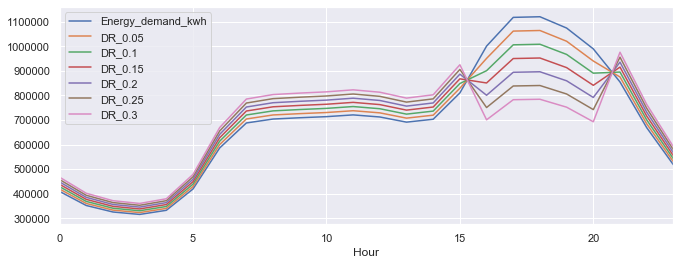

In [58]:
demand_with_DR.groupby('Hour').sum().plot(y=['Energy_demand_kwh','DR_0.05','DR_0.1','DR_0.15','DR_0.2','DR_0.25','DR_0.3'])

8.Through testing by 5% interval, 20% DR level performs the lowest new peak level, which reduces the storage curtailment in the highest level. Thus, 20% DR level produce the largest curtailed energy.

In [59]:
print('DR level=5%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.05'].max())
print('DR level=10%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.1'].max())
print('DR level=15%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.15'].max())
print('DR level=20%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.2'].max())
print('DR level=25%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.25'].max())
print('DR level=30%, the new peak:',demand_with_DR.groupby('Hour').sum()['DR_0.3'].max())

print ('The lowest new peak point:',demand_with_DR.groupby('Hour').sum()['DR_0.2'].max(), 'for 20% DR level.')

DR level=5%, the new peak: 1064832.6935249995
DR level=10%, the new peak: 1008788.8675500002
DR level=15%, the new peak: 952745.0415749996
DR level=20%, the new peak: 935889.6267760628
DR level=25%, the new peak: 956079.8288450768
DR level=30%, the new peak: 976270.0309140931
The lowest new peak point: 935889.6267760628 for 20% DR level.


In [60]:
print('Curtailed energy in 5% DR level:',original_peak-DR_5)
print('Curtailed energy in 10% DR level:',original_peak-DR_10)
print('Curtailed energy in 15% DR level:',original_peak-DR_15)
print('Curtailed energy in 20% DR level:',original_peak-DR_20)
print('Curtailed energy in 25% DR level:',original_peak-DR_25)
print('Curtailed energy in 30% DR level:',original_peak-DR_30)



Curtailed energy in 5% DR level: 56043.82597500086
Curtailed energy in 10% DR level: 112087.6519500002
Curtailed energy in 15% DR level: 168131.47792500083
Curtailed energy in 20% DR level: 184986.89272393764
Curtailed energy in 25% DR level: 164796.69065492356
Curtailed energy in 30% DR level: 144606.48858590727


9.As shown below, the new peak is on the right of the orange line, which belongs to non-peak period. Thus, if we increase DR level, we would have higher new peak value.

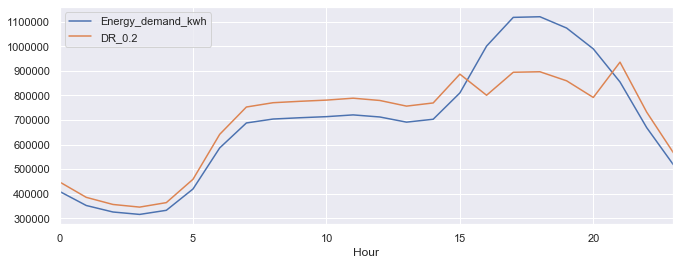

In [61]:
demand_with_DR.groupby('Hour').sum().plot(y=['Energy_demand_kwh','DR_0.2'])

## Part 4

### Discussion

#### Summary of all findings:
- Setpoint forecasting error curtailment for 2017 for 77 turbine is 18026 MWH and the annual Setpoint forecasting error curtailment for 77 turbines in 2016 and 2017 is 27880 MWH. 
- As we asssumed that the wind turbine company needs to remain the hourly peak usage level for unpredicted high energy usage event, the hourly peak usage would be the amount of energy to be stored. The storage curtailment is defined as the opportunity cost between original plan and after implementing DR penetration. Since the original peak value is certain, we should choose the lowest new peak level to ensure that the enough energy the wind turbine company remains is equal to the new peak point. As presented in curtailed energy list for 5% testing interval, 20% DR penetration level produce the largest curtailed energy. Based on comparing the new peak value, we choose DR leve equal to 20% which produces the lowest new peak value. Based on the observation of the DR graph, the ideally optimal DR level should be 20% by testing 5% DR level interval from 5% to 30%. If the level increase to 25%, the max usage during non-peak time would be higher and thus producing new storage curtailment.
- The revenue increased from DR scheme is £32372 based on 4,000 kwh per 700 GBP (Alex suggested on Slack).
At least 3,452 households with 50% of peak time energy usage for heating and cooling system need to be on our DR scheme in order to supply 20% level of DR penetration.
- For people who join the DR scheme, the company offers a £5 discount. For 3452 required in the scheme, £17,260 is required to attract enough local households.
- The remaining £15,112 is for the revenue of the company.

#### Hypotheses testing results:

1. DR penetration will reduce curtailment of energy for the curtailment resulting from storage for unexpected peak usage, but has no influence on setpoint forecasting error.
2. The optimal DR penetration level is less than 30%. In fact it is 20% by 5% interval testing.
3. Only 3,452 out of 8,630 households requred to be in the DR scheme in order to provide the optimal level of DR penetration

#### Errors
1. The number of turbine we estimate is not the same as what we find in the literature, which is 700. However, the dataset provided does not allow us to make assumption of 700 turbines, in which the power generated would be too high.
2. The number of local demand is found around 30MW for the peak demand, which is not align with our data.

#### Strengths  
1. We provide actionable solution for reducing the peak demand, which can provide extra revenue by selling the saved energy to the mainland.
2. We predict the estimated power could be generated by a certain wind speed and find out the setpoint forecasting error.

#### Limitations
1. This report only provides an initial idea on whether it is worth researching on the curtailment to make more revenue. The estimated method for the power generated by turbine is not truely indicating the real case. In fact, the wind can be in different directions, which may not necessary to provide high energy even though the wind speed is high.
2. The function which produces the fitted power may be possible to be enhanced to a higher level accuracy.

# References


1. Orkney transmission project: Consultation on Final Needs Case and Delivery Model; 2018.

2. Wang J, Biviji MA, Wang WM. Lessons learned from smart grid enabled pricingprograms. In: Proceeding of IEEE power and energy conference; 2011. p. 1–7.

3. E. Bloustein. School of planning and public policy. In: Assessment of consumerresponse to real time pricing. Rutgers, the State University of New Jersey;2005.

4. European Commission. An EU Strategy on Heating and Cooling, Communication From The Commission To The European Parliament, The Council, The European Economic And Social Committee And The Committee Of The Regions, Com(2016) 51 final. European Commission, Brussels; 2016.